# Import Library

In [1]:
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load Datasets

In [2]:
def load_datasets_from_folder(folder_path):
    datasets = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path)
            datasets.append(df)
    return datasets

In [3]:
folder_path = 'Datasets'
datasets = load_datasets_from_folder(folder_path)

# Checking the Datasets Imported

In [4]:
datasets[1].head()  # Display the first few rows of the first dataset

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,Badda dhaka,2023-01-01T00:00:00,16.8,16.8,14.4,85.79,0.0,0.0,NaN,0,...,1018.7,0.0,2.3,0,0.0,0,10,Clear,clear-night,"VGHS,41923099999,41922099999"
1,Badda dhaka,2023-01-01T01:00:00,18.5,18.5,16.0,85.56,0.0,0.0,NaN,0,...,1018.0,0.0,1.0,0,0.0,0,10,Clear,clear-night,"VGHS,41922099999"
2,Badda dhaka,2023-01-01T02:00:00,18.0,18.0,16.0,88.10,0.0,0.0,NaN,0,...,1017.5,0.0,1.0,0,0.0,0,10,Clear,clear-night,"VGHS,41922099999"
3,Badda dhaka,2023-01-01T03:00:00,15.5,15.5,14.4,93.21,0.0,0.0,NaN,0,...,1018.3,0.0,1.7,0,0.0,0,10,Clear,clear-night,"VGHS,41941099999,41923099999,41929099999,41922..."
4,Badda dhaka,2023-01-01T04:00:00,16.5,16.5,15.5,93.81,0.0,0.0,NaN,0,...,1018.0,89.1,0.5,0,0.0,0,10,Partially cloudy,fog,"VGHS,41922099999"


In [5]:
datasets[6].info()  # Display information about the first dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14616 entries, 0 to 14615
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              14616 non-null  object 
 1   datetime          14616 non-null  object 
 2   temp              14616 non-null  float64
 3   feelslike         14616 non-null  float64
 4   dew               14616 non-null  float64
 5   humidity          14616 non-null  float64
 6   precip            14616 non-null  float64
 7   precipprob        14616 non-null  float64
 8   preciptype        3224 non-null   object 
 9   snow              14616 non-null  int64  
 10  snowdepth         14616 non-null  int64  
 11  windgust          14616 non-null  float64
 12  windspeed         14616 non-null  float64
 13  winddir           14616 non-null  float64
 14  sealevelpressure  14616 non-null  float64
 15  cloudcover        14616 non-null  float64
 16  visibility        14616 non-null  float6

# Making New Datasets

In [6]:
# crate a new dataframe
finalDataset = pd.DataFrame()
finalDataset

""


## Insert Date & Time

In [7]:
# Convert to pandas datetime
finalDataset['DateTime'] = pd.to_datetime(datasets[0]['datetime'])

In [8]:
finalDataset

,DateTime
0,2023-01-01 00:00:00
1,2023-01-01 01:00:00
2,2023-01-01 02:00:00
3,2023-01-01 03:00:00
4,2023-01-01 04:00:00
...,...
14611,2024-08-31 19:00:00
14612,2024-08-31 20:00:00
14613,2024-08-31 21:00:00
14614,2024-08-31 22:00:00


In [9]:
finalDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14616 entries, 0 to 14615
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  14616 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 114.3 KB


## Expanding DateTime Column

In [10]:
finalDataset['Year'] = finalDataset['DateTime'].dt.year.astype(int)
finalDataset['Month'] = finalDataset['DateTime'].dt.month.astype(int)
finalDataset['Day'] = finalDataset['DateTime'].dt.day.astype(int)
finalDataset['Hour'] = finalDataset['DateTime'].dt.hour.astype(int)

## Adding All Features Column

In [11]:
# Normal Features
finalDataset['Dew'] = pd.concat([df['dew'] for df in datasets], axis=1).mean(axis=1).round(2)
finalDataset['Precip'] = pd.concat([df['precip'] for df in datasets], axis=1).mean(axis=1).round(2)
finalDataset['PrecipProb'] = pd.concat([df['precipprob'] for df in datasets], axis=1).mean(axis=1).round(2)
finalDataset['Windgust'] = pd.concat([df['windgust'] for df in datasets], axis=1).mean(axis=1).round(2)
finalDataset['WindSpeed'] = pd.concat([df['windspeed'] for df in datasets], axis=1).mean(axis=1).round(2)
finalDataset['WindDir'] = pd.concat([df['winddir'] for df in datasets], axis=1).mean(axis=1).round(2)
finalDataset['SeaLevelPressure'] = pd.concat([df['sealevelpressure'] for df in datasets], axis=1).mean(axis=1).round(2)
finalDataset['CloudCover'] = pd.concat([df['cloudcover'] for df in datasets], axis=1).mean(axis=1).round(2)
finalDataset['UVIndex'] = pd.concat([df['uvindex'] for df in datasets], axis=1).mean(axis=1).round(2)
finalDataset['SevereRisk'] = pd.concat([df['severerisk'] for df in datasets], axis=1).mean(axis=1).round(2)

# Target
finalDataset['Temp'] = pd.concat([df['temp'] for df in datasets], axis=1).mean(axis=1).round(2)
finalDataset['FeelsLike'] = pd.concat([df['feelslike'] for df in datasets], axis=1).mean(axis=1).round(2)
finalDataset['Humidity'] = pd.concat([df['humidity'] for df in datasets], axis=1).mean(axis=1).round(2)
finalDataset['Visibility'] = pd.concat([df['visibility'] for df in datasets], axis=1).mean(axis=1).round(2)
finalDataset['SolarEnergy'] = pd.concat([df['solarenergy'] for df in datasets], axis=1).mean(axis=1).round(2)
finalDataset['SolarRadiation'] = pd.concat([df['solarradiation'] for df in datasets], axis=1).mean(axis=1).round(2)
finalDataset['Conditions'] = pd.concat([df['conditions'] for df in datasets], axis=1).mode(axis=1)[0]
finalDataset['Icon'] = pd.concat([df['icon'] for df in datasets], axis=1).mode(axis=1)[0]

## Handle Icon Problem

In [12]:
finalDataset['Icon'].value_counts()

Icon
partly-cloudy-night    3901
partly-cloudy-day      3869
rain                   2886
clear-night            1811
clear-day              1505
cloudy                  623
fog                      20
wind                      1
Name: count, dtype: int64

In [13]:
# Find the index where Icon is 'wind'
wind_index = finalDataset[finalDataset['Icon'] == 'wind'].index[0]

# Get previous and next Icon values
prev_icon = finalDataset.loc[wind_index - 1, 'Icon'] if wind_index > finalDataset.index[0] else None
next_icon = finalDataset.loc[wind_index + 1, 'Icon'] if wind_index < finalDataset.index[-1] else None

# Get the Hour value at wind_index
wind_hour = finalDataset.loc[wind_index, 'Hour']

print(f"Previous Icon: {prev_icon}")
print(f"Wind Icon Index: {wind_index}, Value: wind")
print(f"Hour at Wind Icon Index: {wind_hour}")
print(f"Next Icon: {next_icon}")

Previous Icon: partly-cloudy-night
Wind Icon Index: 3260, Value: wind
Hour at Wind Icon Index: 20
Next Icon: cloudy


In [14]:
# Replace 'wind' with 'cloudy' in the Icon column
finalDataset.loc[finalDataset['Icon'] == 'wind', 'Icon'] = 'cloudy'

In [15]:
finalDataset['Icon'].value_counts()

Icon
partly-cloudy-night    3901
partly-cloudy-day      3869
rain                   2886
clear-night            1811
clear-day              1505
cloudy                  624
fog                      20
Name: count, dtype: int64

## Encoding the Categorical Features

In [16]:
# Encode and replace 'Conditions'
conditions_le = LabelEncoder()
finalDataset['Conditions'] = conditions_le.fit_transform(finalDataset['Conditions'])

# Encode and replace 'Icon'
icon_le = LabelEncoder()
finalDataset['Icon'] = icon_le.fit_transform(finalDataset['Icon'])


print("Conditions encoded labels and original classes:")
for label, cls in enumerate(conditions_le.classes_):
    print(f"{label}: {cls}")

print("\nIcon encoded labels and original classes:")
for label, cls in enumerate(icon_le.classes_):
    print(f"{label}: {cls}")

Conditions encoded labels and original classes:
0: Clear
1: Overcast
2: Partially cloudy
3: Rain
4: Rain, Overcast
5: Rain, Partially cloudy

Icon encoded labels and original classes:
0: clear-day
1: clear-night
2: cloudy
3: fog
4: partly-cloudy-day
5: partly-cloudy-night
6: rain


## Check datasets

In [17]:
finalDataset.head()

,DateTime,Year,Month,Day,Hour,Dew,Precip,PrecipProb,Windgust,WindSpeed,...,UVIndex,SevereRisk,Temp,FeelsLike,Humidity,Visibility,SolarEnergy,SolarRadiation,Conditions,Icon
0,2023-01-01 00:00:00,2023,1,1,0,14.20,0.0,0.0,7.55,0.21,...,0.0,10.0,17.09,17.09,83.38,2.76,0.0,0.0,0,1
1,2023-01-01 01:00:00,2023,1,1,1,15.65,0.0,0.0,8.15,0.17,...,0.0,10.0,18.35,18.35,84.54,1.75,0.0,0.0,0,1
2,2023-01-01 02:00:00,2023,1,1,2,15.66,0.0,0.0,9.59,3.90,...,0.0,10.0,17.85,17.85,87.15,1.75,0.0,0.0,0,1
3,2023-01-01 03:00:00,2023,1,1,3,14.21,0.0,0.0,10.53,3.52,...,0.0,10.0,15.65,15.65,91.28,2.28,0.0,0.0,0,1
4,2023-01-01 04:00:00,2023,1,1,4,15.18,0.0,0.0,10.53,2.65,...,0.0,10.0,16.39,16.39,92.76,1.27,0.0,0.0,2,3


In [18]:
finalDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14616 entries, 0 to 14615
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DateTime          14616 non-null  datetime64[ns]
 1   Year              14616 non-null  int64         
 2   Month             14616 non-null  int64         
 3   Day               14616 non-null  int64         
 4   Hour              14616 non-null  int64         
 5   Dew               14616 non-null  float64       
 6   Precip            14616 non-null  float64       
 7   PrecipProb        14616 non-null  float64       
 8   Windgust          14616 non-null  float64       
 9   WindSpeed         14616 non-null  float64       
 10  WindDir           14616 non-null  float64       
 11  SeaLevelPressure  14616 non-null  float64       
 12  CloudCover        14616 non-null  float64       
 13  UVIndex           14616 non-null  float64       
 14  SevereRisk        1461

## Adding Lagged Features for Past 24 Hours and Horizon for 6 Hours

In [19]:
lagged_features = ['Month', 'Day', 'Hour', 'Dew', 'Precip', 'PrecipProb', 'Windgust', 'WindSpeed', 'WindDir', 'SeaLevelPressure', 'CloudCover', 'UVIndex', 'SevereRisk', 'Temp', 'FeelsLike', 'Humidity', 'Visibility', 'SolarEnergy', 'SolarRadiation', 'Conditions', 'Icon']
horizon_features = ['Temp', 'FeelsLike', 'Humidity', 'Visibility', 'SolarEnergy', 'SolarRadiation', 'Conditions', 'Icon']

In [ ]:
def create_lagged_features(df, lagged_features, horizon_features, lags, horizon):
    """Create lagged features for all columns in df."""
    data = df.copy()
    
    # create lags features
    for lagged_column in lagged_features:
        for lag in range(1, lags+1):
            data[f"{lagged_column}_lag{lag}"] = df[lagged_column].shift(lag)

    # create horizon features
    for horizon_column in horizon_features:
        for h in range(1, horizon+1):
            data[f"{horizon_column}_t+{h}"] = df[horizon_column].shift(-h)

    return data.dropna()

finalDataset = create_lagged_features(finalDataset, lagged_features, horizon_features, lags=24, horizon=6)

In [21]:
finalDataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14586 entries, 24 to 14609
Columns: 575 entries, DateTime to Icon_t+6
dtypes: datetime64[ns](1), float64(568), int64(6)
memory usage: 64.1 MB


## Checking Unique Value Count

In [22]:
unique_counts = finalDataset.nunique()
print(unique_counts)

DateTime    14586
Year            2
Month          12
Day            31
Hour           24
            ...  
Icon_t+2        7
Icon_t+3        7
Icon_t+4        7
Icon_t+5        7
Icon_t+6        7
Length: 575, dtype: int64


## Checking the final Datasets

In [23]:
finalDataset.head(5)

,DateTime,Year,Month,Day,Hour,Dew,Precip,PrecipProb,Windgust,WindSpeed,...,Conditions_t+3,Conditions_t+4,Conditions_t+5,Conditions_t+6,Icon_t+1,Icon_t+2,Icon_t+3,Icon_t+4,Icon_t+5,Icon_t+6
24,2023-01-02 00:00:00,2023,1,2,0,15.19,0.0,0.0,10.31,0.24,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
25,2023-01-02 01:00:00,2023,1,2,1,14.72,0.0,0.0,9.72,0.21,...,0.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,4.0
26,2023-01-02 02:00:00,2023,1,2,2,14.72,0.0,0.0,10.66,0.25,...,0.0,0.0,2.0,2.0,1.0,1.0,1.0,1.0,4.0,4.0
27,2023-01-02 03:00:00,2023,1,2,3,14.23,0.0,0.0,9.91,0.33,...,0.0,2.0,2.0,2.0,1.0,1.0,1.0,4.0,4.0,4.0
28,2023-01-02 04:00:00,2023,1,2,4,14.72,0.0,0.0,10.12,0.20,...,2.0,2.0,2.0,2.0,1.0,1.0,4.0,4.0,4.0,4.0


In [24]:
finalDataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14586 entries, 24 to 14609
Columns: 575 entries, DateTime to Icon_t+6
dtypes: datetime64[ns](1), float64(568), int64(6)
memory usage: 64.1 MB


In [25]:
finalDataset.describe()

,DateTime,Year,Month,Day,Hour,Dew,Precip,PrecipProb,Windgust,WindSpeed,...,Conditions_t+3,Conditions_t+4,Conditions_t+5,Conditions_t+6,Icon_t+1,Icon_t+2,Icon_t+3,Icon_t+4,Icon_t+5,Icon_t+6
count,14586,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,...,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000,14586.000000
mean,2023-11-01 20:30:00,2023.401070,5.727684,15.753599,11.496298,20.789805,0.165143,19.505391,17.075919,8.096791,...,2.044289,2.044358,2.044426,2.044495,3.795283,3.795352,3.795420,3.795489,3.795557,3.795626
min,2023-01-02 00:00:00,2023.000000,1.000000,1.000000,0.000000,2.020000,0.000000,0.000000,0.660000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2023-06-02 22:15:00,2023.000000,3.000000,8.000000,5.000000,17.100000,0.000000,0.000000,9.170000,2.880000,...,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,2023-11-01 20:30:00,2023.000000,6.000000,16.000000,11.000000,21.850000,0.000000,0.000000,14.660000,7.670000,...,2.000000,2.000000,2.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,2024-04-01 18:45:00,2024.000000,8.000000,23.000000,17.000000,24.980000,0.010000,6.450000,23.417500,11.750000,...,2.000000,2.000000,2.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,2024-08-31 17:00:00,2024.000000,12.000000,31.000000,23.000000,28.880000,44.500000,100.000000,84.120000,71.970000,...,5.000000,5.000000,5.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
std,NaN,0.490132,3.192277,8.786893,6.921353,4.824925,0.844688,37.410656,10.200773,6.248622,...,1.567964,1.567897,1.567829,1.567761,1.986011,1.985931,1.985852,1.985773,1.985694,1.985614


# Features Details

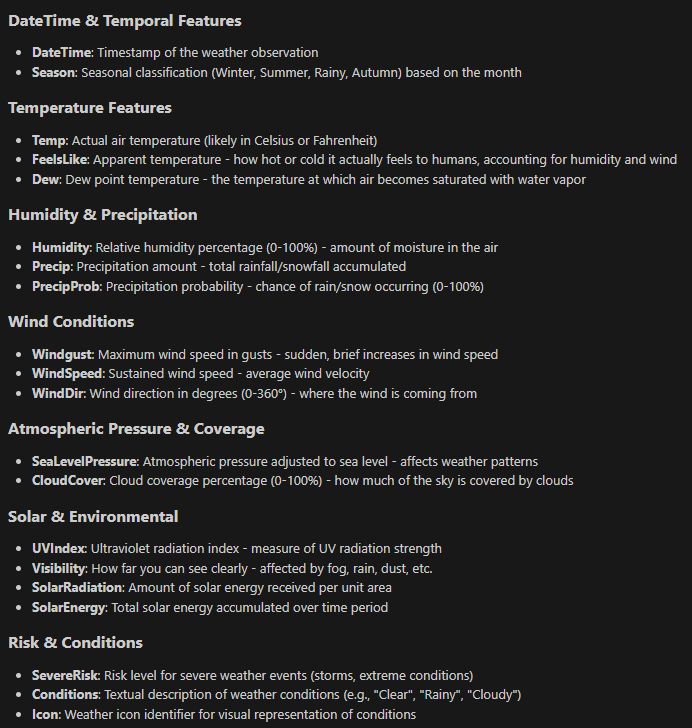

# Save the Datasets

In [26]:
# save the final dataset to a CSV file
finalDataset.to_csv('FinalDatasets/finalDataset.csv', index=False)

# <center><font size="50" color="red">Thank You</font></center>